In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
# Handle the data from the CSV
import csv

csv_data = []
with open('data/combined_tweets.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            csv_data.append(row)
            line_count += 1


Column names are tweet_id, user, text, date, retweets, replies, likes, quotes, has_viz


In [3]:
# Get all of the tweets for all users and split between noviz and viz
viz = []
noviz = []

for tweet in csv_data :
    if tweet[-1] == "True":
        viz.append(int(tweet[6]))
    else:
        noviz.append(int(tweet[6]))

In [4]:
data = [noviz, viz]

In [5]:
fig = plt.figure(figsize =(10, 7))

<Figure size 720x504 with 0 Axes>

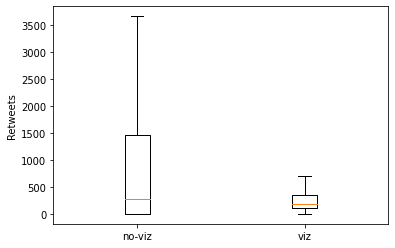

In [6]:
# Creating plot
plt.boxplot(data, notch=False, showfliers=False, labels=["no-viz", "viz"])
plt.ylabel("Retweets")
 
# show plot
plt.show()

In [7]:
a = np.histogram(viz)

In [8]:
def buildBins(min = 0, spacing = 1, numbins = 10) :
    ret = [min + float(x)*spacing for x in range(numbins)]
    return ret

In [9]:
bins = buildBins(min = 1, spacing = 100, numbins = 15)

<function matplotlib.pyplot.show(close=None, block=None)>

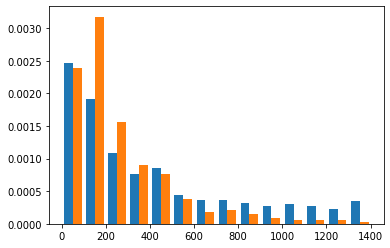

In [10]:
plt.hist(data, bins = bins, density = True)

plt.show